In [40]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel
from uncertainties import unumpy as up
from uncertainties import ufloat
from uncertainties import wrap
from pathlib import Path

In [41]:
def voigt1(x,s1,g1,o1,scale1):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2,c):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)+c

In [42]:
def FWHM(s_p,g_p):
    s = ufloat(s_p.value,s_p.stderr)
    g = ufloat(g_p.value,g_p.stderr)
    fg=s*(8*up.log(2))**0.5
    fl=2*g
    return 0.5346*fl+((fg)**2+(0.2166*fl**2))**0.5

def uvoigt1(out_voigt):
    x_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x = ufloat(x_p.value,x_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    uv=wrap(voigt1)
    return uv(x,s1,g1,o1,scale1)

def uvoigt2(out_voigt):
    x1_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x2_p,s2_p,g2_p,o2_p,scale2_p=out_voigt.result.params['o2'],out_voigt.result.params['s2'],out_voigt.result.params['g2'],out_voigt.result.params['o2'],out_voigt.result.params['scale2']
    x1 = ufloat(x1_p.value,x1_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    x2 = ufloat(x2_p.value,x2_p.stderr)
    s2 = ufloat(s2_p.value,s2_p.stderr)
    g2 = ufloat(g2_p.value,g2_p.stderr)
    o2 = ufloat(o2_p.value,o2_p.stderr)
    scale2 = ufloat(scale2_p.value,scale2_p.stderr)


    uv=wrap(voigt2)

    p1 = uv(x1,s1,s2,g1,g2,o1,o2,scale1,scale2)
    p2 = uv(x2,s1,s2,g1,g2,o1,o2,scale1,scale2)
    return p1,p2

def uvoigt(out_voigt):
    try:
        return uvoigt2(out_voigt)
    except:
        return uvoigt1(out_voigt)

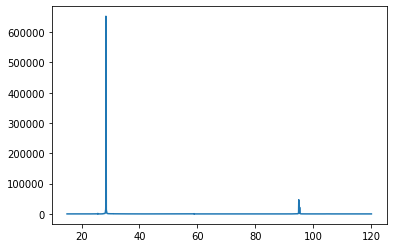

In [43]:
path =  'Data/Si_111_40_40_Ni.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])
plt.plot(data[0],data[1])

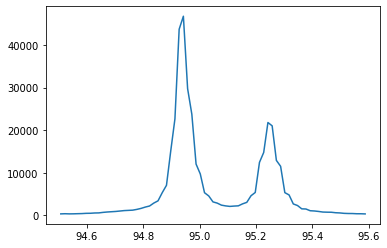

In [44]:
x=[[],[]]
for i in range(len(data[1])):
    if 94.5<data[0,i]<95.6:
        x[0].append(data[0,i])
        x[1].append(data[1,i])
plt.plot(x[0],x[1])

In [45]:
for i in range(len(data[0])):
    if data[0,i]>=95.6:
        print(i)
        break

5373


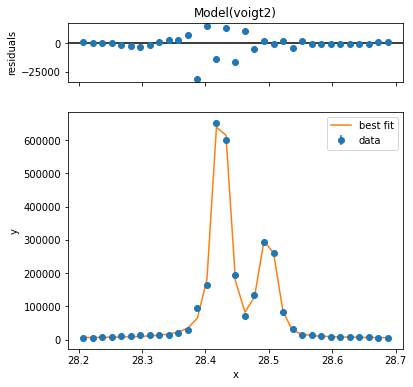

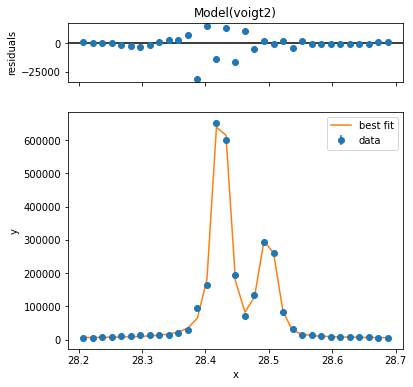

In [46]:
#modell erstellen a1 = [28.2,28.7]->[880,913]    
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0.004,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=28.4,min=28,max=29)
pars_voigt["o2"].set(value=28.5,min=28,max=29)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
pars_voigt["c"].set(1)
 
#Fitten
out_voigt = model_voigt.fit(data[1,880:913],x=data[0,880:913],params=pars_voigt,weights=1/data[2,880:913],nan_policy='propagate')
a1f=out_voigt.fit_report()
a1p=np.array([np.arange(28.2,28.7,0.001),out_voigt.eval(x=np.arange(28.2,28.7,0.001))])


out_voigt.plot()


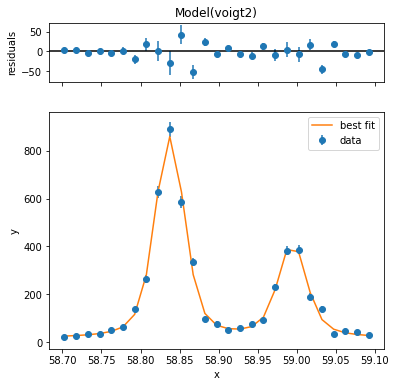

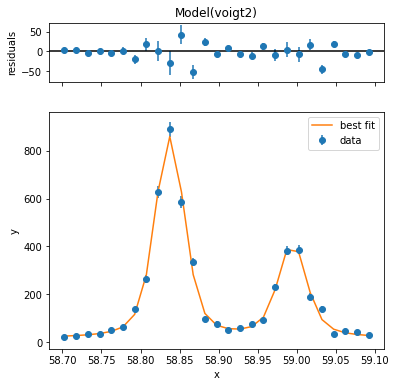

In [47]:
#modell erstellen a2 = [58.7,59.1]->[2913,2940]     
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0.01,max=1)
pars_voigt["g2"].set(value=0.00147,min=0,max=1)
pars_voigt["o1"].set(value=58.8,min=58.7,max=58.85)
pars_voigt["o2"].set(value=58.98,min=58.9,max=59)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
pars_voigt["c"].set(1)
 
#Fitten
out_voigt = model_voigt.fit(data[1,2913:2940],x=data[0,2913:2940],params=pars_voigt,weights=1/data[2,2913:2940],nan_policy='propagate')
a2f=out_voigt.fit_report()
a2p=np.array([np.arange(58.7,59.1,0.001),out_voigt.eval(x=np.arange(58.7,59.1,0.001))])


out_voigt.plot()


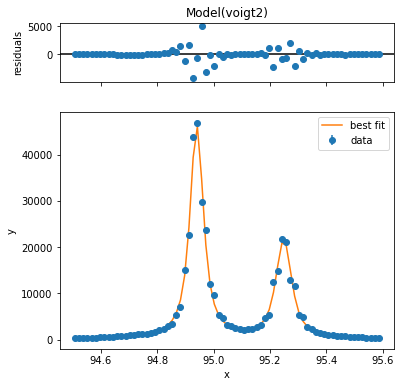

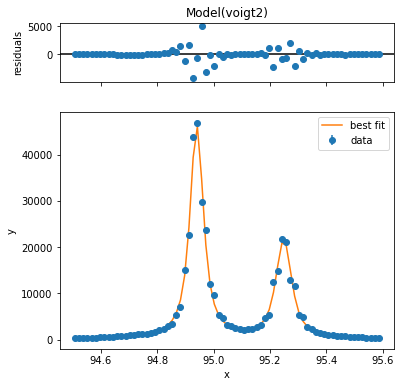

In [48]:
#modell erstellen a3 = [94.5,95.6]->[5300,5373]       
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0.009,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0.009,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=94.8,min=94,max=96)
pars_voigt["o2"].set(value=95.25,min=94,max=96)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
pars_voigt["c"].set(1)
 
#Fitten
out_voigt = model_voigt.fit(data[1,5300:5373],x=data[0,5300:5373],params=pars_voigt,weights=1/data[2,5300:5373],nan_policy='propagate')
a3f=out_voigt.fit_report()
a3p=np.array([np.arange(94.5,95.6,0.001),out_voigt.eval(x=np.arange(94.5,95.6,0.001))])



out_voigt.plot()

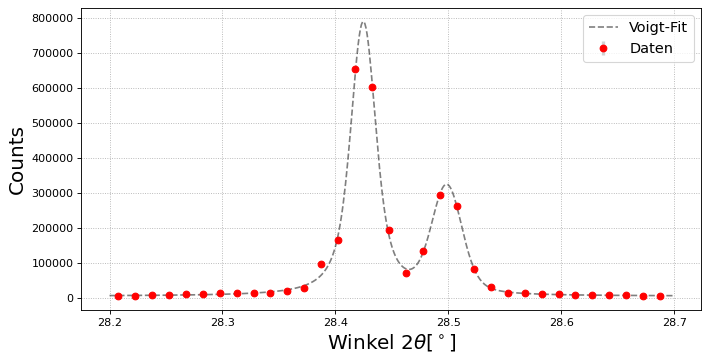

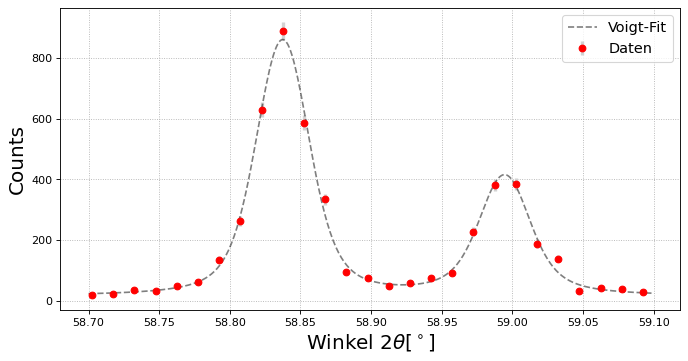

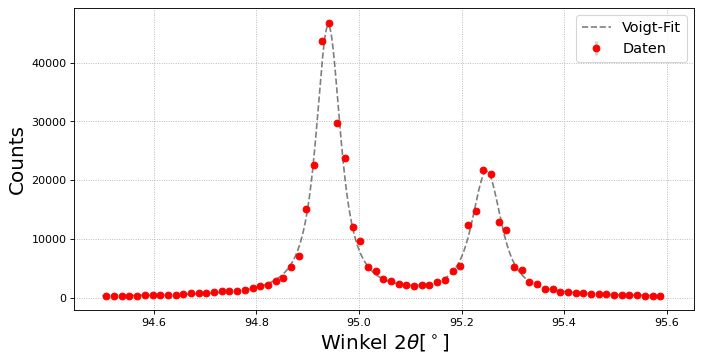

In [49]:


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,880:913],data[1,880:913],yerr=data[2,880:913],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a1p[0],a1p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)





fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,2913:2940],data[1,2913:2940],yerr=data[2,2913:2940],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a2p[0],a2p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)






fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,5300:5373],data[1,5300:5373],yerr=data[2,5300:5373],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a3p[0],a3p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)


In [50]:

print('a1#######################################')
print(a1f)

print('a2#######################################')
print(a2f)

print('a3#######################################')
print(a3f)

a1#######################################
[[Model]]
    Model(voigt2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 113
    # data points      = 33
    # variables        = 9
    chi-square         = 21454.8950
    reduced chi-square = 893.953959
    Akaike info crit   = 231.747618
    Bayesian info crit = 245.216186
[[Variables]]
    s1:      0.00687796 +/- 0.00139496 (20.28%) (init = 0.0137)
    s2:      0.01126556 +/- 0.00138116 (12.26%) (init = 0.0147)
    g1:      0.00841891 +/- 9.6293e-04 (11.44%) (init = 0.0137)
    g2:      0.00475520 +/- 0.00167522 (35.23%) (init = 0.0147)
    o1:      28.4246507 +/- 3.5733e-04 (0.00%) (init = 28.4)
    o2:      28.4985924 +/- 6.4603e-04 (0.00%) (init = 28.5)
    scale1:  28851.9771 +/- 841.030141 (2.91%) (init = 25000)
    scale2:  11734.4699 +/- 611.068334 (5.21%) (init = 15000)
    c:       4332.14779 +/- 805.970199 (18.60%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s1, g1)       